In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import required library**

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## **Reading Dataset and Pre-Processing**

In [4]:
df=pd.read_csv("/content/drive/MyDrive/spam.csv",encoding='ISO-8859-1')

In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
#drop unnamed columns
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 1.0, 'Distribution of Ham and Spam')

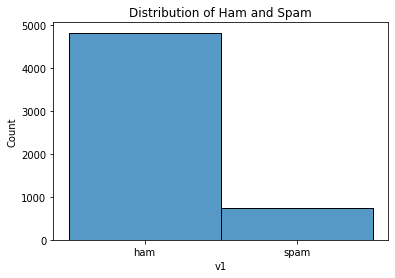

In [11]:
sns.histplot(data=df,x=df['v1'])
plt.title("Distribution of Ham and Spam")

In [23]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [28]:
# Label Encoding target column
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [30]:
# Train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [37]:
# Tokenisation function
from keras.preprocessing.text import Tokenizer
from keras_preprocessing import sequence
from keras.utils import pad_sequences

max_words = 1000
max_len = 150
token = Tokenizer(num_words=max_words)
token.fit_on_texts(x_train)
sequences = token.texts_to_sequences(x_train)

sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [38]:
word_index=token.word_index
word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'your': 12,
 'for': 13,
 'of': 14,
 'it': 15,
 'call': 16,
 'on': 17,
 'have': 18,
 'now': 19,
 '2': 20,
 'are': 21,
 'that': 22,
 'but': 23,
 'so': 24,
 'not': 25,
 'or': 26,
 'will': 27,
 'at': 28,
 'be': 29,
 'can': 30,
 "i'm": 31,
 'get': 32,
 'do': 33,
 'with': 34,
 'just': 35,
 'ur': 36,
 'if': 37,
 'no': 38,
 'this': 39,
 'we': 40,
 '4': 41,
 'gt': 42,
 'lt': 43,
 'when': 44,
 'ok': 45,
 'up': 46,
 'from': 47,
 'out': 48,
 'go': 49,
 'how': 50,
 'free': 51,
 'what': 52,
 'all': 53,
 'then': 54,
 'good': 55,
 'like': 56,
 'know': 57,
 'got': 58,
 'come': 59,
 'time': 60,
 'am': 61,
 'its': 62,
 'day': 63,
 'was': 64,
 'love': 65,
 'only': 66,
 'send': 67,
 'he': 68,
 'there': 69,
 'text': 70,
 'want': 71,
 'as': 72,
 'one': 73,
 'sorry': 74,
 'by': 75,
 'txt': 76,
 'going': 77,
 'need': 78,
 "i'll": 79,
 'lor': 80,
 'stop': 81,
 'back': 82,
 'r': 83,
 'about': 84,
 'ho

## **Create Model and Add Layers (LSTM, Dense-(Hidden Layers), Output)**

In [40]:
from keras.models import Sequential
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from keras.layers import Flatten
model=Sequential()

# embedding layer
model.add(Embedding(max_words,50,input_length=max_len,trainable=True))

# lstm layer
model.add(LSTM(100,return_sequences=True,dropout=0.5))
model.add(Flatten()) 

# Dense layer
model.add(Dense(200,activation='relu',name='HiddenLayer1')) # hidden layer 1
model.add(Dense(100,activation='relu',name='HiddenLayer2')) # hidden layer 2
model.add(Dense(1,activation='sigmoid',name='OutputLayer')) # output layer


In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 150, 100)          60400     
                                                                 
 flatten (Flatten)           (None, 15000)             0         
                                                                 
 HiddenLayer1 (Dense)        (None, 200)               3000200   
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               20100     
                                                                 
 OutputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 3,130,801
Trainable params: 3,130,801
No

## **Compile the Model**


In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## **Fit the Model**

In [44]:
model.fit(sequences_matrix,y_train,batch_size=130,epochs=10,validation_split=0.2,verbose=1)

Epoch 1/10
28/28 [==============================] - 17s 508ms/step - loss: 0.3501 - accuracy: 0.8676 - val_loss: 0.2005 - val_accuracy: 0.9484
Epoch 2/10
28/28 [==============================] - 13s 477ms/step - loss: 0.1090 - accuracy: 0.9736 - val_loss: 0.0610 - val_accuracy: 0.9821
Epoch 3/10
28/28 [==============================] - 13s 476ms/step - loss: 0.0582 - accuracy: 0.9826 - val_loss: 0.0509 - val_accuracy: 0.9854
Epoch 4/10
28/28 [==============================] - 13s 472ms/step - loss: 0.0336 - accuracy: 0.9907 - val_loss: 0.0529 - val_accuracy: 0.9888
Epoch 5/10
28/28 [==============================] - 13s 476ms/step - loss: 0.0249 - accuracy: 0.9913 - val_loss: 0.0492 - val_accuracy: 0.9854
Epoch 6/10
28/28 [==============================] - 13s 474ms/step - loss: 0.0143 - accuracy: 0.9950 - val_loss: 0.0622 - val_accuracy: 0.9888
Epoch 7/10
28/28 [==============================] - 13s 476ms/step - loss: 0.0122 - accuracy: 0.9966 - val_loss: 0.0572 - val_accuracy: 0.9877

## **Save The Model**

In [45]:
model.save('lstm-model')

## **Test The Model**

In [74]:
#test data
test_sequences = token.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [75]:
#train and test accuracy
train_acc=model.evaluate(sequences_matrix,y_train,verbose=1)
test_acc=model.evaluate(test_sequences_matrix,y_test,verbose=1)

35/35 [==============================] - 1s 42ms/step - loss: 0.0669 - accuracy: 0.9848


In [76]:
y_pred=model.predict(test_sequences_matrix)

35/35 [==============================] - 2s 43ms/step


In [86]:
print(y_pred[10:].round(2).T)
print(y_test[10:].T)

[[1.   0.   0.   ... 0.   0.   0.01]]
[[1 0 0 ... 0 0 0]]
